# Data Engineering Capstone Project: Immigration Office Data Warehouse
*Author: Erick Escobar*

This self-explanatory notebook contains information about the EDA process on the dataset files used to construct the
Immigration Office Data Warehouse.

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

The steps 1-2 are described in this notebook. The steps 4-5 are described in the accompanying project write up.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [8]:
%%HTML
<style>
td {
  font-size: 10px
}
</style>

In [3]:
import pandas as pd
from helpers import *

## 1. Scope the Project and Gather Data
### Scope
The scope of this project is to create a Data Lake for the Immigration Service of the US. The Data Lake will contain data gathered from the I94 immigration service, the US demographics department and airport codes from IATA.

### Describe and Gather Data


#### Immigration Dataset

___
This data comes from the US National Tourism and Trade Office.



In [4]:
# read the immigration dataset: SAS data from April 2016
fname_immigration = 'datasets/i94_apr16_sub.sas7bdat'
df = pd.read_sas(fname_immigration, 'sas7bdat', encoding='ISO-8859-1')

In [5]:
# explore the dataframe
df.head()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,6.0,2016.0,4.0,692.0,692.0,XXX,20573.0,NaN,NaN,NaN,...,U,NaN,1979.0,10282016,NaN,NaN,NaN,1.897628e+09,NaN,B2
1,7.0,2016.0,4.0,254.0,276.0,ATL,20551.0,1.0,AL,NaN,...,Y,NaN,1991.0,D/S,M,NaN,NaN,3.736796e+09,00296,F1
2,15.0,2016.0,4.0,101.0,101.0,WAS,20545.0,1.0,MI,20691.0,...,NaN,M,1961.0,09302016,M,NaN,OS,6.666432e+08,93,B2
3,16.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,NaN,M,1988.0,09302016,NaN,NaN,AA,9.246846e+10,00199,B2
4,17.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,NaN,M,2012.0,09302016,NaN,NaN,AA,9.246846e+10,00199,B2


In [6]:
# get the columns and their data types
df.dtypes

cicid       float64
i94yr       float64
i94mon      float64
i94cit      float64
i94res      float64
i94port      object
arrdate     float64
i94mode     float64
i94addr      object
depdate     float64
i94bir      float64
i94visa     float64
count       float64
dtadfile     object
visapost     object
occup        object
entdepa      object
entdepd      object
entdepu      object
matflag      object
biryear     float64
dtaddto      object
gender       object
insnum       object
airline      object
admnum      float64
fltno        object
visatype     object
dtype: object

#### Airport Codes Dataset

___
The airport codes may refer to either IATA airport code, a three-letter code which is used in passenger reservation, ticketing and baggage-handling systems, or the ICAO airport code which is a four letter code used by ATC systems and for airports that do not have an IATA airport code (from wikipedia).



In [25]:
# read the airport codes dataset
fname_airport_codes = 'datasets/airport-codes.csv'
df_airport_codes = pd.read_csv(fname_airport_codes)

In [26]:
# explore the dataframe
df_airport_codes.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [27]:
# get the columns and their data types
df_airport_codes.dtypes

ident            object
type             object
name             object
elevation_ft    float64
continent        object
iso_country      object
iso_region       object
municipality     object
gps_code         object
iata_code        object
local_code       object
coordinates      object
dtype: object

#### US Demographics Dataset

___

This dataset contains information about the demographics of all US cities and census-designated places with a population greater or equal to 65,000.

This data comes from the US Census Bureau's 2015 American Community Survey.


In [35]:
# read the US demographics dataset
fname_demographics = 'datasets/us-cities-demographics.csv'
df_demographics = pd.read_csv(fname_demographics, sep=';')

In [36]:
# explore the dataframe
df_demographics.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


In [37]:
# get the columns and their data types
df_demographics.dtypes

City                       object
State                      object
Median Age                float64
Male Population           float64
Female Population         float64
Total Population            int64
Number of Veterans        float64
Foreign-born              float64
Average Household Size    float64
State Code                 object
Race                       object
Count                       int64
dtype: object

## 2. Explore and Asses the Data
### Explore the Data
In this section we are going to analyze the data quality and identify missing values.
The process of cleaning the data consist of the following steps:
1) Identify the columns that contain more than 80% of the missing values.
2) Remove the columns that contain more than 80% of the missing values.
3) Remove the rows that contain more than 80% of the missing values.


#### Immigration Dataset

___
The following table describes the data dictionary.

In [4]:
# shape of the immigration dataset
print('Immigration dataset part APR16 contains {} rows and {} columns'.format(*df.shape))

Immigration dataset part APR16 contains 3096313 rows and 28 columns


In [60]:
# get the null statistics
df_null_statistics = df.isnull().sum() / len(df)
df_null_statistics.round(3)

cicid       0.000
i94yr       0.000
i94mon      0.000
i94cit      0.000
i94res      0.000
i94port     0.000
arrdate     0.000
i94mode     0.000
i94addr     0.049
depdate     0.046
i94bir      0.000
i94visa     0.000
count       0.000
dtadfile    0.000
visapost    0.608
occup       0.997
entdepa     0.000
entdepd     0.045
entdepu     1.000
matflag     0.045
biryear     0.000
dtaddto     0.000
gender      0.134
insnum      0.963
airline     0.027
admnum      0.000
fltno       0.006
visatype    0.000
dtype: float64

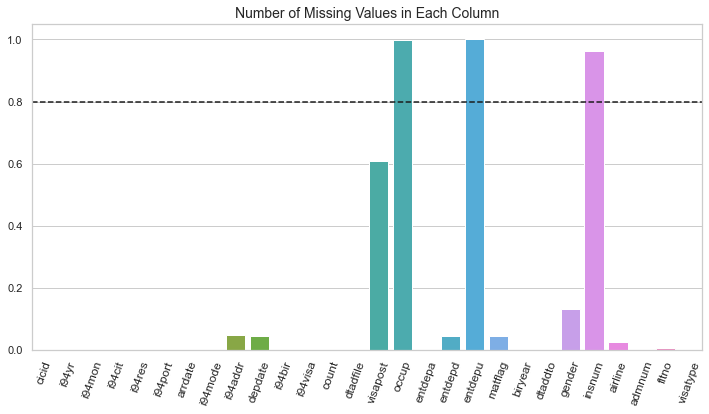

In [56]:
plot_missing_values(df=df)

In [66]:
# identify the columns with missing values
columns_to_drop = df_null_statistics[df_null_statistics > 0.8].index.to_list()
columns_to_drop

In [76]:
# clean the dataframe
df = clean_dataframe(df=df, columns_to_drop=columns_to_drop)

KeyError: "['occup', 'entdepu', 'insnum'] not found in axis"

In [75]:
print('Cleaned Immigration dataset part APR16 contains {} rows and {} columns'.format(*df.shape))

Cleaned Immigration dataset part APR16 contains 3096313 rows and 25 columns


#### Airport Codes Dataset

___
The following table describes the data dictionary.

In [28]:
# shape of the immigration dataset
print('Airport dataset contains {} rows and {} columns'.format(*df_airport_codes.shape))

Airport dataset contains 57421 rows and 12 columns


In [29]:
# get the null statistics
df_null_statistics = df_airport_codes.isnull().sum() / len(df_airport_codes)
df_null_statistics.round(3)

ident           0.000
type            0.000
name            0.000
elevation_ft    0.136
continent       0.495
iso_country     0.004
iso_region      0.000
municipality    0.103
gps_code        0.276
iata_code       0.839
local_code      0.477
coordinates     0.000
dtype: float64

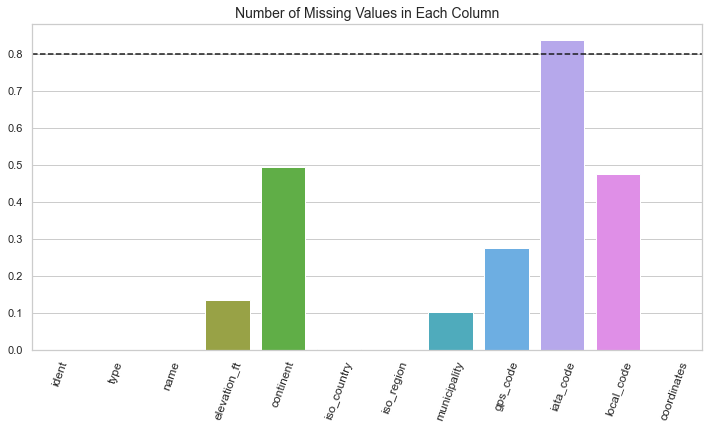

In [30]:
plot_missing_values(df=df_airport_codes)

In [31]:
# identify the columns with missing values
columns_to_drop = df_null_statistics[df_null_statistics > 0.8].index.to_list()
columns_to_drop

['iata_code']

In [32]:
# clean the dataframe
df_airport_codes = clean_dataframe(df=df_airport_codes, columns_to_drop=columns_to_drop)

In [33]:
print('Cleaned Airport Codes dataset contains {} rows and {} columns'.format(*df_airport_codes.shape))

Cleaned Airport Codes dataset contains 57421 rows and 11 columns


#### US Demographics Dataset

____

The following table describes the data dictionary.


In [38]:
# shape of the demographics dataset
print('US Demographics dataset contains {} rows and {} columns'.format(*df_demographics.shape))

US Demographics dataset contains 2891 rows and 12 columns


In [39]:
# get the null statistics
df_null_statistics = df_demographics.isnull().sum() / len(df_demographics)
df_null_statistics.round(3)

City                      0.000
State                     0.000
Median Age                0.000
Male Population           0.001
Female Population         0.001
Total Population          0.000
Number of Veterans        0.004
Foreign-born              0.004
Average Household Size    0.006
State Code                0.000
Race                      0.000
Count                     0.000
dtype: float64

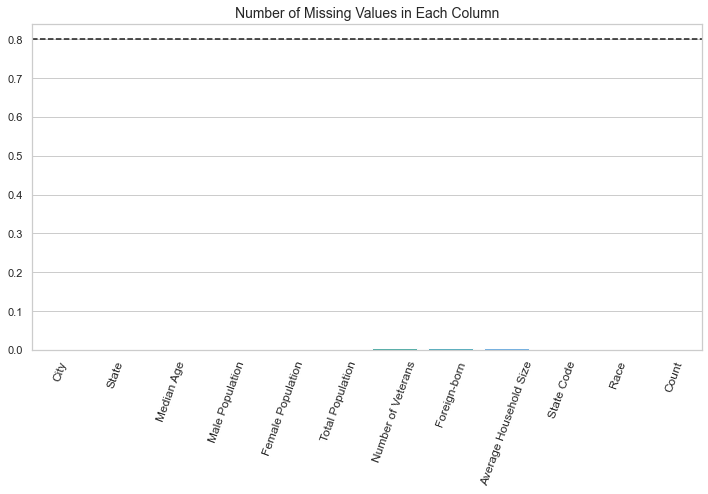

In [40]:
plot_missing_values(df=df_demographics)

In [41]:
# identify the columns with missing values
columns_to_drop = df_null_statistics[df_null_statistics > 0.8].index.to_list()
columns_to_drop

[]

In [42]:
# clean the dataframe
df_demographics = clean_dataframe(df=df_demographics, columns_to_drop=columns_to_drop)

In [43]:
print('Cleaned US Demographics dataset contains {} rows and {} columns'.format(*df_demographics.shape))

Cleaned US Demographics dataset contains 2891 rows and 12 columns
